In [1]:
exec(open('./initNotebook.py').read())

# Load Data

In [2]:
kinD6D8 = read_csv('../../FESR/configurations/2019/wKinematicD6D8/fits.csv')
kinAlD6D8 = read_csv('../../FESR/configurations/2019/wKinematicAlphaD6D8/fits.csv')


## Plots with free Alpha

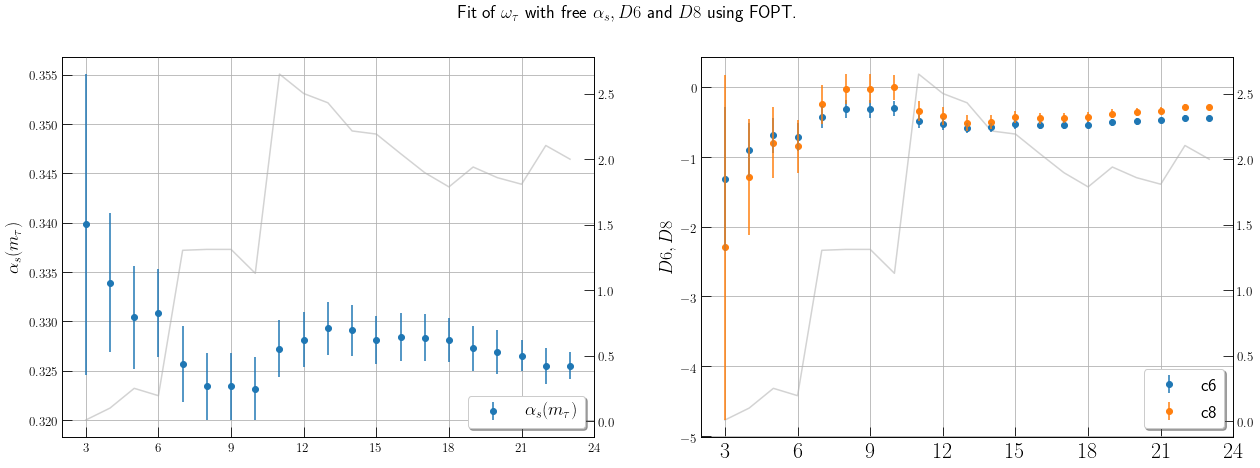

In [3]:
fig, (axes) = plt.subplots(1, 2, figsize=(21, 7))
fig.suptitle(r'Fit of $\omega_\tau$ with free $\alpha_s, D6$ and $D8$ using FOPT.')
plt.xticks(list(sminMap.values()), fontsize=22)
addAx(axes, 0, ['alpha'], kinAlD6D8, ylabel=r'$\alpha_s(m_\tau)$')
addAx(axes, 1, ['c6', 'c8'], kinAlD6D8, ylabel='$D6, D8$')

fig.savefig('./plots/wKinematicAlpha.png', dpi=300)
plt.show()

In the plots we can see the result of fitting $\alpha_s(m_\tau), c_6$ and $c_8$ using $\omega_\tau$ in FOPT for 3- to 23 $s_0$-moments (the lowest $s_0$ moment is given by $s_{min} = 1.5GeV^2$). The best value (with a $\chi^2/dof = 1.12$) yields $\alpha_s(m_\tau) = 0.3231(32)$ with $c6 = -0.30(11)$ and $c8 = 0.00(18)$ for $s_{min}=1.925$ ($10  s_0s$-moments).
$\alpha_s$ varies wave-like for inreasing $s_0$-moments within error ranges and converges around $\alpha_s \approx 0.325$. With an increasing number of $s_0s$-moments the error decrease, but $\chi^2/dof$ increases. The error of $\alpha_s$ is smallest for the biggest $s_0s$-moment number and would decrease for more $s_0s$-moments.
For $c_6$ and $c_8$ we see an inverted wave-like behavior, meaning that their values first increases, then slightly decrease until they converge for a value around $c_6 \approx -0.4$ and $c_8 = -0.3$. This inverted behavior shows that if we increase the $\alpha_s$ contribution to our integral-moment the other contributions, $c_6$ and $c_8$, have to decrease. The values of $c_6$ and $c_8$ vary also within error ranges, which "vanish" for heigher $s_0s$-moment numbers.
We also plotted the $\chi^2/dof$ function as gray line in the background of the plots. Their values can be read off the right y-axis. One notices three plateaus: The first one for $3-6$ $s_0s$-moments with a $\chi^2/dof \approx 0$ the second one for $7-10$ $s_0s$-moments with a good $\chi^2/dof \approx 1.3$ and another for $11-23 s_0s$-moments with a to big value of $\chi^2/dof > 2$, which tells us that  $7-10$ is a good choice for the number of fitted moments.
Due to the previous discussion we see that the fit results are solid, with an $\alpha_s(m_\tau) = 0.3231(32)$. Problematic are the heigher values for $\alpha_s$ for lower $s_{min}$ or more $s_0s$ moments. The values of $\alpha_s$ are 2% heigher in the 2nd $\chi^2$ plateau.

### Correlation of $c_6$ and $c_8$

In [29]:
rAlphaC8, _ = stats.pearsonr(kinAlD6D8['alpha'], kinAlD6D8['c6'])
rC6C8, _ = stats.pearsonr(kinAlD6D8['c6'], kinAlD6D8['c8'])
print(r'Pearsons r for $\alpha_s-c_8 =$: ', rAlphaC8)
print(r'Pearsons r for $c_6-c_8 =$: ', rC6C8)

Pearsons r for $\alpha_s-c_8 =$:  -0.9914086952783082
Pearsons r for $c_6-c_8 =$:  0.995920629934654


We test the correlation of $\alpha_s$ with $c_8$ and $c_6$ with $c_8$ with the help of \textit{Pearsons r}. The former yields a value of $r_{\alpha_s, c_6} = -0.99$, which suggest a strongly antiproportional behavior, whereas the latter $r_{c_6, c_8} \approx 1$ advocates perfect propotionality. The pearson squares explain the inverted wave-like behavior we have seen before.

### Test for OPE series convergence

In [56]:
testOPESeriesForConvergence(kinAlD6D8)


smin15      True
smin1525    True
smin155     True
smin1575    True
smin16      True
smin1625    True
smin165     True
smin1675    True
smin17      True
smin175     True
smin18      True
smin185     True
smin19      True
smin195     True
smin20      True
smin21      True
smin22      True
smin23      True
smin24      True
smin26      True
smin28      True
dtype: bool

## Plots with fixed Alpha

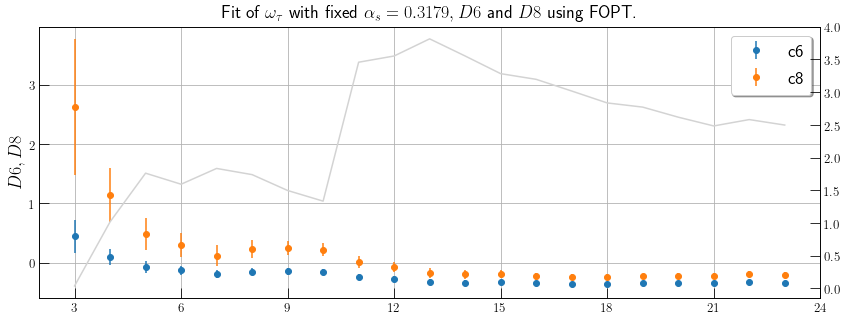

In [72]:
s0s = list(map(lambda smin: sminMap[smin], kinD6D8.index))
plt.title(r'Fit of $\omega_\tau$ with fixed $\alpha_s = 0.3179, D6$ and $D8$ using FOPT.')
plt.gca().set_ylabel(r'$D6, D8$')
plt.errorbar(s0s, kinD6D8['c6'], barsabove=True, yerr=kinD6D8['c6Err'], fmt='.', marker='o', label='c6')
plt.errorbar(s0s, kinD6D8['c8'], barsabove=True, yerr=kinD6D8['c8Err'], fmt='.', marker='o', label='c8')
plt.gca().legend()
plt.gcf().set_size_inches(14, 5)

ax_r = plt.gca().twinx()
ax_r.plot(s0s, kinD6D8['chiDof'], color='lightgrey')
ax_r.grid(False)

plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.gcf().savefig('./plots/wKinematicFixedAlpha.png', dpi=300)
plt.show()

In the above plot we investigated the behavior of $c_6$ and $c_8$ for a fixed $\alpha_s=0.3179$. The best $\chi^2/dof=1.33$ values for $c_6=-0.15(53)$ and $c_8=0.22(11)$ can be found for $10 s_0s$ moments for $s_{min}=1.925GeV^2$. The fit including a free $\alpha_s$ shows very similar behavior to this fit, except the $c_6$ and $c_8$ series behavior has been inverted. They decrease, increase and converges to values $c_6 \approx -0.34$ and $c_8 \approx -0.21$. The values of the two OPE coefficients are smaller than the ones from the fit with free $\alpha_s$, which can be explained due to the lower value for $\alpha_s=0.3179$ (before we had $\alpha_s \approx 0.33$) compensating the bigger values of $c_8$ and $c_6$. One still sees the strong correlation between the two coefficients and also notes that they are getting closer to each other with increasing $s_0s$-moment number.

In [76]:
testOPESeriesForConvergence(kinD6D8)

smin15      True
smin1525    True
smin155     True
smin1575    True
smin16      True
smin1625    True
smin165     True
smin1675    True
smin17      True
smin175     True
smin18      True
smin185     True
smin19      True
smin195     True
smin20      True
smin21      True
smin22      True
smin23      True
smin24      True
smin26      True
smin28      True
dtype: bool

OPE series converges for fits with fixed $\alpha_s$.

# Conclusion
The fits show no sign of inconsitency and have a good $\chi^2/dof$. Furthermore the variation of $\alpha_s$ for different moments setups is small, which let us raise the question of why additional frameworks than the OPE are needed to measure the strong coupling in $\tau$-fits.
Using $\omega_\tau$ is probably the best weight of measuring $\alpha_s$. Other weights like the cubic or (worse) the quartic weight generate problems within my fitting routines for heigher numbers of $s_0s$-moments.
